# Variational quantum eigensolvers for solving this matrix:   
\begin{bmatrix} % you can specify any environment according to your choice  
1 & 0& 0&0\\ 
0& 0& -1&0\\
0 & -1 &0&0\\
0&0&0&1\\
\end{bmatrix} 


<b>We do this on 3 steps :</b>
<ol>
<li>Constructing the anzatz</li>
<li>Hamiltonian</li>
<li>Do the measurements</li>
</ol> 

## I am going to use qiskit & scipy

In [165]:
import numpy as np; pi = np.pi
from qiskit import QuantumCircuit, Aer, execute
from scipy.optimize import minimize
from qiskit.visualization import plot_histogram
from qiskit.circuit.library.standard_gates import U2Gate
from copy import deepcopy as make_copy

# First prapering the anzatz: 
using the hint that in the <b>screening Task paper</b> the anzatz is consisiting of $R_{x}$ ,**Cnot** and **H**-Rotation X, Controlled not and Hadmard gates-with depth of the ciruct is equal to   **D=2**.


In [166]:
def prepare_anz_circuit(depth, angle1):

    anz_circ = QuantumCircuit(depth)

    anz_circ.rx(angle1[0], 0)
    anz_circ.cx(0, 1)
    anz_circ.h(0)
    anz_circ.rx(angle1[0], 0)
    anz_circ.cx(0, 1)
    anz_circ.h(0)
    
    return anz_circ 

# Second constucting the Hamiltonian: 
## after the calculations I find the hamiltonian is equal to: 
### H=0.5*$Z\bigotimes Z $-0.5*$I\bigotimes I$+0.5*$X\bigotimes X$ -0.5*$Y\bigotimes Y $

# Third Doing the measurements: 


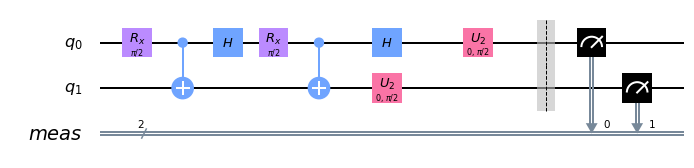

In [168]:
def measure_yy_circuit(angle1):
    anz_circuit = prepare_hets_circuit(2,angle1)
    yy_meas= make_copy(anz_circuit)

    
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    
    yy_meas.u2(0, np.pi/2, 0)
    yy_meas.u2(0, np.pi/2, 1)
    yy_meas.measure_all()
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - END

    return yy_meas
yy =measure_yy_circuit([pi/2,pi])
yy.draw('mpl')

In [169]:
 def measure_yy(angle1, num_shots = 10000):

    yy_meas = measure_yy_circuit(angle1)
    
    result = execute(yy_meas, backend = simulator, shots = num_shots).result()
    counts = result.get_counts(yy_meas)

    if '00' not in counts:
        counts['00'] = 0
    if '01' not in counts:
        counts['01'] = 0
    if '10' not in counts:
        counts['10'] = 0
    if '11' not in counts:
        counts['11'] = 0 

    total_counts = counts['00'] + counts['11'] + counts['01'] + counts['10']
    yy = counts['00'] + counts['11'] - counts['01'] - counts['10']
    yy = yy / total_counts
    
    return yy
#yy = measure_yy([pi,pi])
#print("<YY> =", str(yy))

In [160]:
def measure_xx_circuit(angle2):
        
    hets_circuit =prepare_hets_circuit(2,angle2)
    xx_meas = make_copy(hets_circuit)
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    
    xx_meas.h(0)
    xx_meas.h(1)
    xx_meas.measure_all()
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - END

    return xx_meas

In [161]:
def measure_xx(angle2, num_shots = 10000):
    
    xx_meas = measure_xx_circuit(angle2)
    
    result = execute(xx_meas, backend = simulator, shots = num_shots).result()
    counts = result.get_counts(xx_meas)

    if '00' not in counts:
        counts['00'] = 0
    if '01' not in counts:
        counts['01'] = 0
    if '10' not in counts:
        counts['10'] = 0
    if '11' not in counts:
        counts['11'] = 0

    total_counts = counts['00'] + counts['11'] + counts['01'] + counts['10']
    xx = counts['00'] + counts['11'] - counts['01'] - counts['10']
    xx = xx / total_counts
    
    return xx

#xx = measure_xx(hets_circuit)
#print("<XX> =", str(xx))

In [127]:
def measure_zz_circuit(angle2):
    hets_circuit =prepare_hets_circuit(2,angle2)
    zz_meas = make_copy(hets_circuit)
    zz_meas.measure_all()
    return zz_meas


In [128]:
def measure_zz(angle2, num_shots = 10000):
    zz_meas = measure_zz_circuit(angle2)
    
    result = execute(zz_meas, backend = simulator, shots = num_shots).result()
    counts = result.get_counts(zz_meas)

    if '00' not in counts:
        counts['00'] = 0
    if '01' not in counts:
        counts['01'] = 0
    if '10' not in counts:
        counts['10'] = 0
    if '11' not in counts:
        counts['11'] = 0 

    total_counts = counts['00'] + counts['11'] + counts['01'] + counts['10']
    zz = counts['00'] + counts['11'] - counts['01'] - counts['10']
    zz = zz / total_counts
    
    return zz

In [129]:
def get_energy(angle2, num_shots = 10000):
    
    zz= measure_zz(angle2, num_shots = num_shots)
    xx= measure_xx(angle2, num_shots = num_shots)
    yy= measure_yy(angle2, num_shots = num_shots)

    energy =0.5*zz-0.5*xx+0.5-0.5*yy
    return energy

In [130]:
parameters_array = np.array([np.pi, np.pi])
tol = 1e-3 # tolerance for optimization precision.
vqe_result = minimize(get_energy, parameters_array, method="Powell", tol=tol)
print('The estimated ground state energy from VQE algorithm is: {}'.format(vqe_result.fun))


The estimated ground state energy from VQE algorithm is: -1.0
